Matplotlib is building the font cache; this may take a moment.


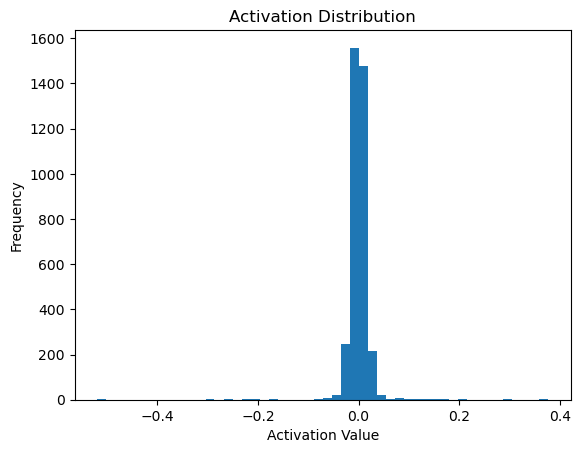

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open("activations.pkl", "rb") as f:
    activations = pickle.load(f)

# Plot histogram of first layer
first_layer = list(activations.values())[0]
plt.hist(first_layer.flatten(), bins=50)
plt.title("Activation Distribution")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.show()

In [5]:
for i in activations.keys():
    print(i)
    print(activations[i].shape)


model.embed_tokens
(1, 1, 3584)
model.rotary_emb
(1, 1, 128)
model.layers.0.input_layernorm
(1, 1, 3584)
model.layers.0.self_attn.q_proj
(1, 1, 3584)
model.layers.0.self_attn.k_proj
(1, 1, 512)
model.layers.0.self_attn.v_proj
(1, 1, 512)
model.layers.0.self_attn.o_proj
(1, 1, 3584)
model.layers.0.post_attention_layernorm
(1, 1, 3584)
model.layers.0.mlp.gate_proj
(1, 1, 18944)
model.layers.0.mlp.act_fn
(1, 1, 18944)
model.layers.0.mlp.up_proj
(1, 1, 18944)
model.layers.0.mlp.down_proj
(1, 1, 3584)
model.layers.1.input_layernorm
(1, 1, 3584)
model.layers.1.self_attn.q_proj
(1, 1, 3584)
model.layers.1.self_attn.k_proj
(1, 1, 512)
model.layers.1.self_attn.v_proj
(1, 1, 512)
model.layers.1.self_attn.o_proj
(1, 1, 3584)
model.layers.1.post_attention_layernorm
(1, 1, 3584)
model.layers.1.mlp.gate_proj
(1, 1, 18944)
model.layers.1.mlp.act_fn
(1, 1, 18944)
model.layers.1.mlp.up_proj
(1, 1, 18944)
model.layers.1.mlp.down_proj
(1, 1, 3584)
model.layers.2.input_layernorm
(1, 1, 3584)
model.layers.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
import pickle

# Storage for activations
activations = {}

def get_activation_hook(name):
    """Create a hook function to capture activations."""
    def hook(module, input, output):
        # Store activation, move to CPU and convert to numpy
        if isinstance(output, tuple):
            activations[name] = output[0].detach().cpu().numpy()
        else:
            activations[name] = output.detach().cpu().numpy()
    return hook

tokenizer = AutoTokenizer.from_pretrained(".", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    ".",
    trust_remote_code=True,
    torch_dtype=torch.float16
)
model.to("mps")

# Register hooks on all layers (AFTER model is loaded)
# hooks = []
# for name, module in model.named_modules():
#     if len(list(module.children())) == 0:  # Only leaf modules
#         hook = module.register_forward_hook(get_activation_hook(name))
#         hooks.append(hook)

text = "tell me how much is 2+2"
messages = [{"role": "user", "content": text}]
input_text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer(input_text, return_tensors="pt").to("mps")

# Run forward pass to capture activations
with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=512, temperature=0.6)

response = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
print(response)

# Remove hooks
# for hook in hooks:
#     hook.remove()

# Save activations to file
# print(f"\nSaving {len(activations)} activation layers...")
# with open("activations.pkl", "wb") as f:
#     pickle.dump(activations, f)
# print("Activations saved to activations.pkl")

# Also save as numpy arrays (optional - for easier loading)
# np.savez_compressed("activations.npz", **activations)
# print("Activations also saved to activations.npz")


/Users/adisi/miniconda3/envs/inter_251208/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [01:02<00:00, 31.24s/it]


In [ ]:
text = "tell me how much is 2+2 <think> mmm ok now i need to think about it, i should think of this question"
messages = [{"role": "user", "content": text}]
input_text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

inputs = tokenizer(input_text, return_tensors="pt").to("mps")

# Run forward pass to capture activations
with torch.no_grad():
    outputs = model.generate(**inputs, max_new_tokens=512, temperature=0.6)

response = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
print(response)